In [3]:
# Importing packages for running linear regression with sklearn
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%pylab inline
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

Populating the interactive namespace from numpy and matplotlib


In [9]:
data=pd.read_csv("linear-reg-sample.csv") # Data loaded from the working directory

In [18]:
data.head(4) # Print the data upto 4 rows

x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388

In [19]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [20]:
data.describe() #Univariate Analysis, Calculates all statistic Function

x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
x    300 non-null int64
y    300 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [22]:
#Check corelation between the two continous variables
print(pearsonr(data[['x']],data[['y']]))
# Result is the correlation coefficient and associated p-value.

(array([ 0.9945453]), array([  1.32551471e-294]))


In [24]:
# Preprocess the data to remove any points with a missing x and y value
filtered_data= data[~np.isnan(data['y'])]  #remove rows with NAN in them
filtered_data=filtered_data.dropna() #remove rows with Missing row values

In [27]:
data.head()

x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864

In [29]:
# Fit a linear Regression model using sklearn's LinearRegressionn package
npMatrix=np.matrix(filtered_data)
X,Y = npMatrix[:,0], npMatrix[:,1] # Convert them into numpy array for modeling
#Use square bracket id you know names of column

In [32]:
print(X.shape)
print(Y.shape)

(300, 1)
(300, 1)


In [34]:
model_1=LinearRegression().fit(X,Y)

In [36]:
y_pred = model_1.predict(npMatrix[:,0]) # Prediction with best fit model over actual data to calculate A-P

In [38]:
model_1.score(X,Y) #R square value in the current Model

0.98912036114027158

In [40]:
#Alternate way ofgetting wxplained variance
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(Y,y_pred))           # Explained Variance
print(mean_squared_error(Y,y_pred)) # RMSE

0.98912036114
9.16428786061


In [44]:
m = model_1.coef_       #array of all the possible coefficient
b = model_1.intercept_  #only one intercept

In [45]:
# y=mx+b
print ("formula: y = {0}x +{1}".format(m,b)) #following slope intercept form

formula: y = [[ 1.01433536]]x +[-0.46181077]


In [46]:
X = np.array(X)
Y = np.array(Y)

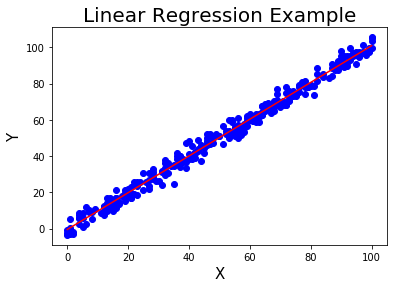

In [49]:
plt.scatter(X,Y, color='blue')
plt.plot([0,100],[b,m*100+b],'r') #plot 'red' color regression line
plt.title('Linear Regression Example', fontsize = 20)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.show() # For creating the final Plot